In [1]:
from seasight.loaders.vessels import VesselDatasetLoader
import numpy as np
import tensorflow as tf
from tensorflow_docs.vis import embed
import imageio

2024-04-01 20:49:08.058120: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 20:49:08.696498: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/timboslice/.cache/pypoetry/virtualenvs/seasight-81j49svZ-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_dir = '../data/Sea-Vessels-Dataset-2'
label_map_path = '../data/Sea-Vessels-Dataset-2/train/Sea-Vessels_label_map.pbtxt'

vessel_loader = VesselDatasetLoader(dataset_dir, label_map_path)

train_ds = vessel_loader.load_dataset_images_labels(split="train", batch_size=32, num_classes=8)
val_ds = vessel_loader.load_dataset_images_labels(split="valid", batch_size=32, num_classes=8)
test_ds = vessel_loader.load_dataset_images_labels(split="test", batch_size=32, num_classes=8)

2024-04-01 20:49:09.810122: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-01 20:49:09.849327: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
train_example = next(iter(train_ds))
test_example = next(iter(test_ds))
val_example = next(iter(val_ds))

In [4]:
train_example[0]

<tf.Tensor: shape=(32, 416, 416, 3), dtype=float32, numpy=
array([[[[0.7647059 , 0.7921569 , 0.8235294 ],
         [0.79607844, 0.8235294 , 0.85490197],
         [0.8       , 0.827451  , 0.85882354],
         ...,
         [0.28235295, 0.43529412, 0.7058824 ],
         [0.28235295, 0.43529412, 0.7058824 ],
         [0.28627452, 0.4392157 , 0.70980394]],

        [[0.8       , 0.827451  , 0.85882354],
         [0.7058824 , 0.73333335, 0.7647059 ],
         [0.7176471 , 0.74509805, 0.7764706 ],
         ...,
         [0.28235295, 0.43529412, 0.7058824 ],
         [0.28627452, 0.4392157 , 0.70980394],
         [0.28627452, 0.4392157 , 0.70980394]],

        [[0.76862746, 0.79607844, 0.827451  ],
         [0.78039217, 0.80784315, 0.8392157 ],
         [0.827451  , 0.85490197, 0.8862745 ],
         ...,
         [0.28627452, 0.4392157 , 0.70980394],
         [0.28627452, 0.4392157 , 0.70980394],
         [0.28627452, 0.4392157 , 0.70980394]],

        ...,

        [[0.40784314, 0.54509807,

In [5]:
train_example[1]

<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 1.],
       [0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [

In [6]:
import keras
from keras import layers
from keras import ops

batch_size = 8
num_channels = 3
num_classes = 8
image_size = 416
latent_dim = 128

generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)


136 11


In [7]:
discriminator = keras.Sequential(
    [
        layers.InputLayer((416, 416, discriminator_in_channels)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)
"""
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels,)),
        # Start with a dense layer and reshape to 7x7
        layers.Dense(7 * 7 * generator_in_channels),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Reshape((7, 7, generator_in_channels)),
        # Upsample to 14x14
        layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        # Upsample to 28x28
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        # Upsample to 56x56
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        # Upsample to 112x112
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        # Upsample to 224x224
        layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        # Upsample to 448x448
        layers.Conv2DTranspose(16, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        # Here we have a 448x448 output. We need to downsample to 416x416.
        # This can be done through a combination of Conv2D and resizing.
        # Conv2D to reduce the dimensions slightly
        layers.Conv2D(3, (3, 3), strides=(1, 1), padding="valid"),
        # Resize to 416x416 - assuming the channel dimension doesn't change
        layers.Resizing(416, 416),
    ],
    name="generator",
)
"""
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels,)),
        # We want to generate 128 + num_classes coefficients to reshape into a
        # 7x7x(128 + num_classes) map.
        layers.Dense(104 * 104 * generator_in_channels),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Reshape((104, 104, generator_in_channels)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(1, (104, 104), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

In [10]:
def define_discriminator(in_shape=(416,416,3)):
    model = keras.Sequential()
    # downsample
    model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(layers.LeakyReLU(alpha=0.2))
    # downsample
    model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    # classifier
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim):
    model = keras.Sequential()
    # foundation for 7x7 image
    n_nodes = 128 * 104 * 104
    model.add(layers.Dense(n_nodes, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Reshape((104, 104, 128)))
    # upsample to 14x14
    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    # generate
    model.add(layers.Conv2D(1, (104,104), activation='tanh', padding='same'))
    return model

In [11]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = keras.Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [35]:
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout, Input, Embedding, Concatenate
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
"""
def define_discriminator(in_shape=(416,416,3)):
    model = keras.Sequential()
    # downsample
    model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(layers.LeakyReLU(alpha=0.2))
    # downsample
    model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    # classifier
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
"""
# define the standalone discriminator model
def define_discriminator(in_shape=(416,416,3), n_classes=8):
    # label input
    in_label = Input(shape=(3,))
    # embedding for categorical input
    li = Embedding(n_classes, 50)(in_label)
    # scale up to image dimensions with linear activation
    n_nodes = in_shape[0] * in_shape[1]
    li = Dense(n_nodes)(li)
    # reshape to additional channel
    li = Reshape((in_shape[0], in_shape[1], 3))(li)
    # image input
    in_image = Input(shape=in_shape)
    # concat label as a channel
    merge = Concatenate()([in_image, li])
    # downsample
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
    fe = LeakyReLU(alpha=0.2)(fe)
    # downsample
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    # flatten feature maps
    fe = Flatten()(fe)
    # dropout
    fe = Dropout(0.4)(fe)
    # output
    out_layer = Dense(1, activation='sigmoid')(fe)
    # define model
    model = Model([in_image, in_label], out_layer)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


# define the standalone generator model
"""
def define_generator(latent_dim):
    model = keras.Sequential()
    # foundation for 7x7 image
    n_nodes = 128 * 104 * 104
    model.add(layers.Dense(n_nodes, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Reshape((104, 104, 128)))
    # upsample to 14x14
    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    # generate
    model.add(layers.Conv2D(1, (104,104), activation='tanh', padding='same'))
    return model
"""

# define the standalone generator model
def define_generator(latent_dim, n_classes=8):
    # label input
    in_label = Input(shape=(1,))
    # embedding for categorical input
    li = Embedding(n_classes, 50)(in_label)
    # linear multiplication
    n_nodes = 104 * 104
    li = Dense(n_nodes)(li)
    # reshape to additional channel
    li = Reshape((104, 104, 1))(li)
    # image generator input
    in_lat = Input(shape=(latent_dim,))
    # foundation for 7x7 image
    n_nodes = 128 * 104 * 104
    gen = Dense(n_nodes)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Reshape((104, 104, 128))(gen)
    # merge image gen and label input
    merge = Concatenate()([gen, li])
    # upsample to 14x14
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
    gen = LeakyReLU(alpha=0.2)(gen)
    # upsample to 28x28
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    # output
    out_layer = Conv2D(1, (104,104), activation='tanh', padding='same')(gen)
    # define model
    model = Model([in_lat, in_label], out_layer)
    return model

"""
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
"""

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # get noise and label inputs from generator model
    gen_noise, gen_label = g_model.input
    # get image output from the generator model
    gen_output = g_model.output
    # connect image output and label input from generator as inputs to discriminator
    gan_output = d_model([gen_output, gen_label])
    # define gan model as taking noise and label and outputting a classification
    model = Model([gen_noise, gen_label], gan_output)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

"""
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = zeros((n_samples, 1))
    return X, y
"""

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    images = generator.predict([z_input, labels_input])
    # create class labels
    y = zeros((n_samples, 1))
    return [images, labels_input], y

"""
# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # select images
    X = dataset[ix]
    # generate class labels
    y = ones((n_samples, 1))
    return X, y
"""

# select real samples
def generate_real_samples(dataset, n_samples):
    # split into images and labels
    images, labels = dataset
    
    # choose random instances
    ix = tf.random.uniform((n_samples,), 0, images.shape[0], dtype=tf.int32)
    
    # select images and labels
    X = tf.gather(images, ix)
    labels = tf.gather(labels, ix)
    
    # generate class labels
    y = tf.ones((n_samples, 1))
    
    return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=8):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = randint(0, n_classes, n_samples)
    return [z_input, labels]

 
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=32):
    bat_per_epo = int(next(iter(dataset))[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)

    # manually enumerate epochs
    for i in range(n_epochs):
        print(f"Epoch {i+1}/{n_epochs}")
        
        # iterate over the dataset
        for j in dataset:
            # get randomly selected 'real' samples
            [X_real, labels_real], y_real = generate_real_samples(j, half_batch)

            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)

            # generate 'fake' examples
            [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
            
            # prepare points in latent space as input for the generator
            [z_input, labels_input] = generate_latent_points(latent_dim, batch_size)
            
            # create inverted labels for the fake samples
            y_gan = ones((batch_size, 1))
            
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
            
            # summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
            (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        
    # save the generator model at the end of each epoch
    g_model.save('generator_epoch_{}.h5'.format(i+1))

    return g_model

In [36]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# train model
train(g_model, d_model, gan_model, val_ds, latent_dim)

ValueError: Exception encountered when calling Functional.call().

[1mThe total size of the tensor must be unchanged. Received: input_shape=(1, 173056), target_shape=(416, 416, 3)[0m

Arguments received by Functional.call():
  • args=(['<KerasTensor shape=(None, 416, 416, 1), dtype=float32, sparse=False, name=keras_tensor_400>', '<KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=keras_tensor_387>'],)
  • kwargs={'mask': ['None', 'None']}

In [8]:
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_images, one_hot_labels = data
        
        # Add dummy dimensions to the labels so that they can be concatenated with
        # the images. This is for the discriminator.
        image_one_hot_labels = one_hot_labels[:, :, None, None]
        image_one_hot_labels = ops.repeat(
            image_one_hot_labels, repeats=[image_size * image_size]
        )
        image_one_hot_labels = ops.reshape(
            image_one_hot_labels, (-1, image_size, image_size, num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        random_vector_labels = ops.concatenate(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Decode the noise (guided by labels) to fake images.
        generated_images = self.generator(random_vector_labels)
        # Ensure the generated images have the same shape as real images
        print(generated_images)

        # Combine them with real images. Note that we are concatenating the labels
        # with these images here.
        fake_image_and_labels = ops.concatenate(
            [generated_images, image_one_hot_labels], -1
        )
        real_image_and_labels = ops.concatenate([real_images, image_one_hot_labels], -1)
        combined_images = ops.concatenate(
            [fake_image_and_labels, real_image_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake images.
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        random_vector_labels = ops.concatenate(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Assemble labels that say "all real images".
        misleading_labels = ops.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_images = self.generator(random_vector_labels)
            fake_image_and_labels = ops.concatenate(
                [fake_images, image_one_hot_labels], -1
            )
            predictions = self.discriminator(fake_image_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }


In [31]:
cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

cond_gan.fit(val_ds, epochs=60)


Epoch 1/60


Tensor("data:0", shape=(None, None, None, 3), dtype=float32)
Tensor("data_1:0", shape=(None, 8), dtype=float32)
Tensor("generator_1/conv2d_20_1/Sigmoid:0", shape=(None, 416, 416, 1), dtype=float32)


ValueError: Dimension 2 in both shapes must be equal, but are 9 and 11. Shapes are [416,416,9] and [416,416,11]. for '{{node concat_3}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32](concat_1, concat_2, concat_3/axis)' with input shapes: [?,416,416,9], [?,416,416,11], [] and with computed input tensors: input[2] = <0>.

In [32]:
# We first extract the trained generator from our Conditional GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate images that would be generated in
# between the interpolation + 2 (start and last images).
num_interpolation = 6  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = keras.random.normal(shape=(1, latent_dim))
interpolation_noise = ops.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = ops.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(first_number, second_number):
    # Adjust the class numbers to be zero-based
    first_number_adjusted = first_number - 1
    second_number_adjusted = second_number - 1

    # Convert the start and end labels to one-hot encoded vectors.
    first_label = keras.utils.to_categorical([first_number_adjusted], num_classes)
    second_label = keras.utils.to_categorical([second_number_adjusted], num_classes)
    first_label = ops.cast(first_label, "float32")
    second_label = ops.cast(second_label, "float32")

    # Calculate the interpolation vector between the two labels.
    percent_second_label = ops.linspace(0, 1, num_interpolation)[:, None]
    percent_second_label = ops.cast(percent_second_label, "float32")
    interpolation_labels = (
        first_label * (1 - percent_second_label) + second_label * percent_second_label
    )

    print(interpolation_labels)

    # Combine the noise and the labels and run inference with the generator.
    noise_and_labels = ops.concatenate([interpolation_noise, interpolation_labels], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake


start_class = 1  # @param {type:"slider", min:1, max:8, step:1}
end_class = 8  # @param {type:"slider", min:1, max:8, step:1}

fake_images = interpolate_class(start_class, end_class)


tf.Tensor(
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.8        0.         0.         0.         0.         0.
  0.         0.2       ]
 [0.6        0.         0.         0.         0.         0.
  0.         0.4       ]
 [0.39999998 0.         0.         0.         0.         0.
  0.         0.6       ]
 [0.19999999 0.         0.         0.         0.         0.
  0.         0.8       ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]], shape=(6, 8), dtype=float32)


In [ ]:
pred = fake_images


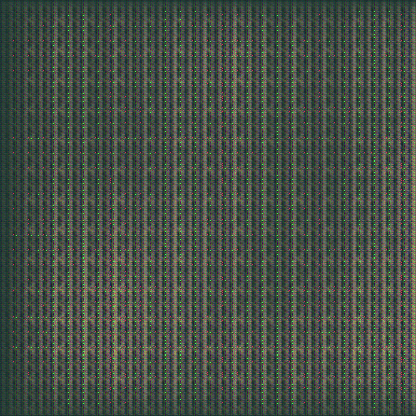

In [ ]:
fake_images *= 255.0
converted_images = fake_images.astype(np.uint8)
#converted_images = ops.image.resize(converted_images, (96, 96)).numpy().astype(np.uint8)
imageio.mimsave("animation.gif", converted_images, fps=1)
embed.embed_file("animation.gif")

In [ ]:
fake_images /= 255.0

In [ ]:
fake_images

array([[[[0.10292462, 0.21488072, 0.1596496 ],
         [0.1127465 , 0.14225939, 0.24650554],
         [0.14088564, 0.2236608 , 0.15720956],
         ...,
         [0.17062548, 0.19658987, 0.24973385],
         [0.14434156, 0.29114637, 0.16998637],
         [0.14397493, 0.18178427, 0.25033984]],

        [[0.04392305, 0.19167605, 0.21531972],
         [0.1203789 , 0.19936994, 0.20763573],
         [0.09461719, 0.23873468, 0.22536406],
         ...,
         [0.19042373, 0.27185422, 0.18757626],
         [0.08824087, 0.31737885, 0.26538843],
         [0.18164122, 0.23341312, 0.16007905]],

        [[0.1298447 , 0.23051526, 0.16737297],
         [0.16128698, 0.18644184, 0.25929707],
         [0.16859241, 0.2696703 , 0.19293039],
         ...,
         [0.26091117, 0.21725002, 0.3056674 ],
         [0.26349083, 0.34269726, 0.16495994],
         [0.21578626, 0.21654442, 0.2853083 ]],

        ...,

        [[0.08565114, 0.18792713, 0.21043576],
         [0.14715998, 0.21120621, 0.19565982]